In [21]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt


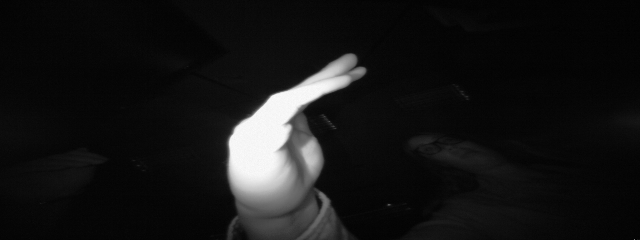

In [22]:
sample = cv2.imread('/content/drive/MyDrive/hand_recog/c/frame_00_09_0001.png')
display = cv2_imshow(sample)

In [23]:
import tensorflow as tf



train , validation = tf.keras.utils.image_dataset_from_directory("/content/drive/MyDrive/hand_recog",
                                                                 labels="inferred",
                                                                 label_mode="int",
                                                                 validation_split=0.2,
                                                                 image_size = (224,224),
                                                                 seed=23,
                                                                 color_mode="grayscale",
                                                                 subset="both")

Found 1285 files belonging to 10 classes.
Using 1028 files for training.
Using 257 files for validation.


In [24]:
print(train)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [25]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,InputLayer
from tensorflow.keras.models import Sequential


In [45]:
model = Sequential([
    InputLayer(input_shape=(224,224,1)),
    Conv2D(16,(3,3),activation='relu'),
    MaxPool2D((2,2)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPool2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPool2D((2,2)),
    Flatten(),
    Dense(64,activation='relu'),
    Dense(10,activation='softmax')
])

In [46]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 222, 222, 16)      160       
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 111, 111, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 54, 54, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 26, 26, 64)       

In [47]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [48]:
model.fit(train,validation_data=validation,epochs=3)

Epoch 1/3
33/33 [==============================] - 6s 128ms/step - loss: 7.4330 - accuracy: 0.4290 - val_loss: 0.7015 - val_accuracy: 0.8054
Epoch 2/3
33/33 [==============================] - 6s 127ms/step - loss: 0.2317 - accuracy: 0.9280 - val_loss: 0.1497 - val_accuracy: 0.9728
Epoch 3/3
33/33 [==============================] - 4s 112ms/step - loss: 0.0160 - accuracy: 0.9951 - val_loss: 0.2330 - val_accuracy: 0.9728


In [87]:
pred_img = cv2.imread('/content/drive/MyDrive/hand_recog/palm/frame_00_01_0001.png')

In [88]:
pred_image = cv2.resize(pred_img,(224,224))

In [89]:
pred_image = cv2.cvtColor(pred_image,cv2.COLOR_BGR2GRAY)

In [90]:
pred_image = np.array(pred_image)

In [91]:
pred_image = np.expand_dims(pred_image,axis=0)

In [92]:
model.predict(pred_image)

1/1 [==============================] - 0s 21ms/step


array([[2.1868370e-07, 5.0612005e-07, 5.3766440e-04, 4.5772630e-08,
        2.2640391e-04, 2.1653830e-03, 2.5927539e-03, 9.9447685e-01,
        1.7963870e-08, 1.8461911e-07]], dtype=float32)

In [93]:
label = np.argmax(model.predict(pred_image))

1/1 [==============================] - 0s 17ms/step


In [94]:
print(label)

7


In [95]:
model.save('hand_recog.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [96]:
model = tf.keras.models.load_model('/content/hand_recog.h5')

In [97]:
data = {
    0:'c',
    1:'down',
    2:'fist',
    3:'fist_moved',
    4:'index',
    5:'l',
    6:'ok',
    7:'palm',
    8:'palm_moved',
    9:'thumb',
}

In [98]:
print(data[label])

palm
